# 0. Install and Import dependencies

In [155]:
!pip install tensorflow==1.15.0 stable-baselines gym-anytrading gym quantstats

Processing /Users/michaellachocki/Library/Caches/pip/wheels/bb/eb/d5/034cb7967c8a31d4c2153df9bf43c5e172b999f4cc192aa1d8/QuantStats-0.0.34-py2.py3-none-any.whl
  Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)
Processing /Users/michaellachocki/Library/Caches/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983/yfinance-0.1.63-py2.py3-none-any.whl
     |████████████████████████████████| 4.5 MB 1.4 MB/s eta 0:00:01
  Attempting uninstall: lxml
    Found existing installation: lxml 4.5.0
    Uninstalling lxml-4.5.0:
      Successfully uninstalled lxml-4.5.0
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.1.54
    Uninstalling yfinance-0.1.54:
      Successfully uninstalled yfinance-0.1.54


In [94]:
import sys
print(sys.version)
import platform
platform.architecture()[0]

3.7.6 (default, Jan  8 2020, 13:42:34) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


'64bit'

In [156]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import quantstats as qs

# 1. Bring in Marketwatch GME Data 
https://www.marketwatch.com/investing/stock/gme/download-data?startDate=11/1/2019&endDate=03/12/2021

In [187]:
df = pd.read_csv('data/TQQQ.csv')
df.rename(columns={'t':'Date','c':'Close','h':'High','l':'Low','v':'Volume','o':'Open','rsi':'RSI'},inplace=True)

In [188]:
df.head()

,Date,Open,High,Low,Close,Volume
0,7/13/20,61.025002,62.974998,54.845001,55.424999,93646200
1,7/14/20,53.794998,56.860001,51.695000,56.599998,114937800
2,7/15/20,57.430000,58.110001,54.695000,56.880001,91886000
3,7/16/20,55.020000,56.180000,53.494999,55.660000,74993000
4,7/17/20,56.080002,56.520000,54.500000,55.919998,57750800


In [189]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

In [190]:
df.sort_values('Date', ascending=True, inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume
0,2020-07-13,61.025002,62.974998,54.845001,55.424999,93646200
1,2020-07-14,53.794998,56.860001,51.695000,56.599998,114937800
2,2020-07-15,57.430000,58.110001,54.695000,56.880001,91886000
3,2020-07-16,55.020000,56.180000,53.494999,55.660000,74993000
4,2020-07-17,56.080002,56.520000,54.500000,55.919998,57750800


In [191]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-07-13,61.025002,62.974998,54.845001,55.424999,93646200
2020-07-14,53.794998,56.860001,51.695000,56.599998,114937800
2020-07-15,57.430000,58.110001,54.695000,56.880001,91886000
2020-07-16,55.020000,56.180000,53.494999,55.660000,74993000
2020-07-17,56.080002,56.520000,54.500000,55.919998,57750800


In [192]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,250), window_size=5)

In [193]:
env.signal_features

array([[ 5.54249990e+01,  0.00000000e+00],
       [ 5.65999980e+01,  1.17499900e+00],
       [ 5.68800010e+01,  2.80003000e-01],
       [ 5.56600000e+01, -1.22000100e+00],
       [ 5.59199980e+01,  2.59998000e-01],
       [ 6.06800000e+01,  4.76000200e+00],
       [ 5.87400020e+01, -1.93999800e+00],
       [ 5.94199980e+01,  6.79996000e-01],
       [ 5.47649990e+01, -4.65499900e+00],
       [ 5.31450000e+01, -1.61999900e+00],
       [ 5.60000000e+01,  2.85500000e+00],
       [ 5.38950000e+01, -2.10500000e+00],
       [ 5.57300000e+01,  1.83500000e+00],
       [ 5.66349980e+01,  9.04998000e-01],
       [ 5.96899990e+01,  3.05500100e+00],
       [ 6.19150010e+01,  2.22500200e+00],
       [ 6.27200010e+01,  8.05000000e-01],
       [ 6.32200010e+01,  5.00000000e-01],
       [ 6.56399990e+01,  2.41999800e+00],
       [ 6.34949990e+01, -2.14500000e+00],
       [ 6.26399990e+01, -8.55000000e-01],
       [ 5.90849990e+01, -3.55500000e+00],
       [ 6.35050010e+01,  4.42000200e+00],
       [ 6.

# 2. Build Environment

In [194]:
env.action_space

Discrete(2)

info {'total_reward': 39.389963, 'total_profit': 0.6188440431684218, 'position': 0}


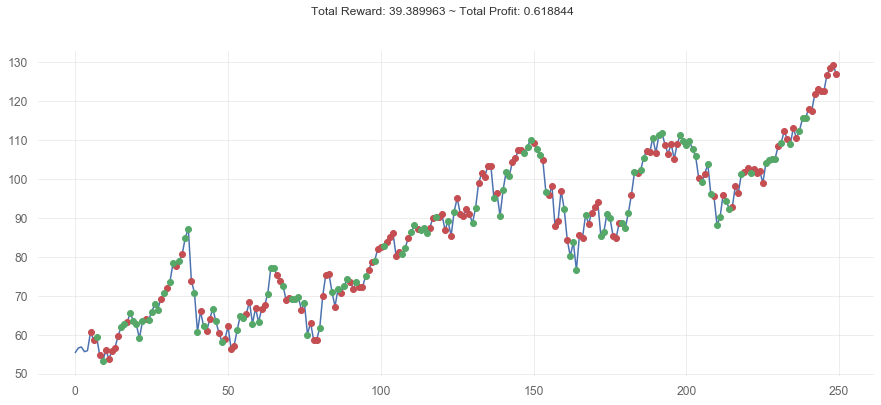

In [195]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

# 2.1 Add Custom Indicators

## 2.1.1. Install and Import New Dependencies

In [196]:
!pip install finta

In [197]:
from gym_anytrading.envs import StocksEnv
from finta import TA

## 2.1.2. Fix Volume Column

In [112]:
df['Volume'] = df['Volume'].apply(lambda x: float(x.replace(",", "")))

AttributeError: 'int' object has no attribute 'replace'

In [198]:
df.dtypes
print(df['Volume'].unique())

[ 93646200 114937800  91886000  74993000  57750800  62905400  73578400
  56947200  84162200  89304600  66906000  59675600  48570200  75550000
  89953800  54467000  52752000  40595400  48016000  74177000  63577800
  77568400  55311800  58570400  49934400  31666200  37328400  51461800
  38193600  41070000  62846000  43139200  54915800  75650600  49536400
  45099600  48286800  72342400 110756200 140370200 106706200  72588000
 116484200  96449400  67258200  75222400  76535400 111711200 115760600
  93828600  78766600 101376800  93759000  81119600  68332800  55451400
  84692000  69669000  99888400  52697600  86412200  56272200  49473400
  48817800  73529200  70965400  74147400  62269200  57024200  69388800
  68677600  60643200  59790800  47772000  79278400  55965000  92360000
  69093600 115405600  75568000  67484600  84593800  75066200  67575600
  82932800  84333400  63415400  71671800  52373800  53437200  45676000
  38585400  39835400  32498400  44765200  39003800  32169400  23231800
  4615

## 2.1.3. Calculate SMA, RSI and OBV

In [199]:
df['SMA'] = TA.SMA(df, 12)
df['RSI'] = TA.RSI(df)
df['OBV'] = TA.OBV(df)
df.fillna(0, inplace=True)

In [200]:
df.head(15)

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2020-07-13,61.025002,62.974998,54.845001,55.424999,93646200,0.000000,0.000000,0.0
2020-07-14,53.794998,56.860001,51.695000,56.599998,114937800,0.000000,100.000000,114937800.0
2020-07-15,57.430000,58.110001,54.695000,56.880001,91886000,0.000000,100.000000,206823800.0
2020-07-16,55.020000,56.180000,53.494999,55.660000,74993000,0.000000,51.065698,131830800.0
2020-07-17,56.080002,56.520000,54.500000,55.919998,57750800,0.000000,56.006489,189581600.0
2020-07-20,56.400002,61.115002,55.544998,60.680000,62905400,0.000000,85.289875,252487000.0
2020-07-21,61.794998,61.834999,58.200001,58.740002,73578400,0.000000,66.005979,178908600.0
2020-07-22,59.084999,60.064999,57.825001,59.419998,56947200,0.000000,68.679115,235855800.0
2020-07-23,59.154999,59.619999,53.785000,54.764999,84162200,0.000000,43.475566,151693600.0


## 2.1.4. Create New Environments

In [204]:
#IMPORTANT
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low', 'Volume', 'RSI']].to_numpy()[start:end]#,'SMA','OBV'
    return prices, signal_features

In [205]:
#IMPORTANT
class MyCustomEnv(StocksEnv):
    _process_data = add_signals
    
env2 = MyCustomEnv(df=df, window_size=12, frame_bound=(12,50))

In [206]:
env2.signal_features

array([[5.48450010e+01, 9.36462000e+07, 0.00000000e+00],
       [5.16950000e+01, 1.14937800e+08, 1.00000000e+02],
       [5.46950000e+01, 9.18860000e+07, 1.00000000e+02],
       [5.34949990e+01, 7.49930000e+07, 5.10656976e+01],
       [5.45000000e+01, 5.77508000e+07, 5.60064891e+01],
       [5.55449980e+01, 6.29054000e+07, 8.52898752e+01],
       [5.82000010e+01, 7.35784000e+07, 6.60059792e+01],
       [5.78250010e+01, 5.69472000e+07, 6.86791154e+01],
       [5.37850000e+01, 8.41622000e+07, 4.34755660e+01],
       [5.05050010e+01, 8.93046000e+07, 3.82190633e+01],
       [5.37400020e+01, 6.69060000e+07, 4.97499821e+01],
       [5.36850010e+01, 5.96756000e+07, 4.33287772e+01],
       [5.45750010e+01, 4.85702000e+07, 4.94534611e+01],
       [5.36800000e+01, 7.55500000e+07, 5.21973666e+01],
       [5.64399990e+01, 8.99538000e+07, 6.00761409e+01],
       [6.10299990e+01, 5.44670000e+07, 6.46464316e+01],
       [6.11699980e+01, 5.27520000e+07, 6.61559680e+01],
       [6.24550020e+01, 4.05954

In [207]:
df.head()

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2020-07-13,61.025002,62.974998,54.845001,55.424999,93646200,0.0,0.000000,0.0
2020-07-14,53.794998,56.860001,51.695000,56.599998,114937800,0.0,100.000000,114937800.0
2020-07-15,57.430000,58.110001,54.695000,56.880001,91886000,0.0,100.000000,206823800.0
2020-07-16,55.020000,56.180000,53.494999,55.660000,74993000,0.0,51.065698,131830800.0
2020-07-17,56.080002,56.520000,54.500000,55.919998,57750800,0.0,56.006489,189581600.0


# 3. Build Environment and Train

In [208]:
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [209]:
model = A2C('MlpLstmPolicy', env, verbose=1) 
model.learn(total_timesteps=100000)

---------------------------------
| explained_variance | 0.00225  |
| fps                | 17       |
| nupdates           | 1        |
| policy_entropy     | 0.692    |
| total_timesteps    | 5        |
| value_loss         | 17.3     |
---------------------------------
---------------------------------
| explained_variance | -8.5e+06 |
| fps                | 665      |
| nupdates           | 100      |
| policy_entropy     | 0.691    |
| total_timesteps    | 500      |
| value_loss         | 0.00481  |
---------------------------------
---------------------------------
| explained_variance | -0.00886 |
| fps                | 774      |
| nupdates           | 200      |
| policy_entropy     | 0.692    |
| total_timesteps    | 1000     |
| value_loss         | 8.39     |
---------------------------------
---------------------------------
| explained_variance | 0.019    |
| fps                | 861      |
| nupdates           | 300      |
| policy_entropy     | 0.691    |
| total_timest

KeyboardInterrupt: 

# 4. Evaluation

In [218]:
frameLowBound=80
frameHighBound=249
env = MyCustomEnv(df=df, window_size=12, frame_bound=(frameLowBound,frameHighBound))
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    #print(obs,rewards,done,info)
    if done:
        print("info", info)
        break

info {'total_reward': 32.65997800000001, 'total_profit': 1.1652615299942937, 'position': 1}


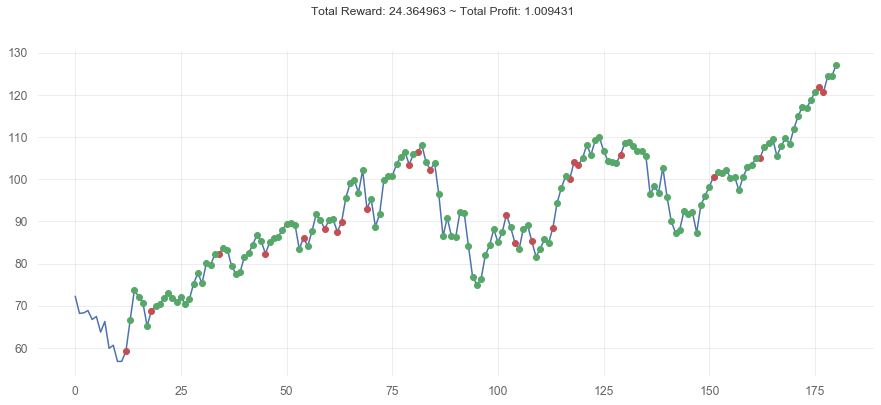

In [214]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

                           Strategy
-------------------------  ----------
Start Period               2020-11-05
End Period                 2021-07-07
Risk-Free Rate             0.0%
Time in Market             12.0%

Cumulative Return          24.96%
CAGR%                      39.55%

Sharpe                     1.13
Sortino                    1.94
Sortino/√2                 1.37

Max Drawdown               -19.2%
Longest DD Days            139
Volatility (ann.)          34.93%
Calmar                     2.06
Skew                       1.86
Kurtosis                   32.22

Expected Daily %           0.13%
Expected Monthly %         2.51%
Expected Yearly %          11.78%
Kelly Criterion            30.04%
Risk of Ruin               0.0%
Daily Value-at-Risk        -3.46%
Expected Shortfall (cVaR)  -3.46%

Gain/Pain Ratio            0.78
Gain/Pain (1M)             1.27

Payoff Ratio               0.82
Profit Factor              1.78
Common Sense Ratio         inf
CPC Index                 

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2021-02-18,2021-03-18,2021-07-07,139,-19.200523,-18.642958
2,2021-01-15,2021-01-15,2021-01-21,6,-1.646678,0.000000


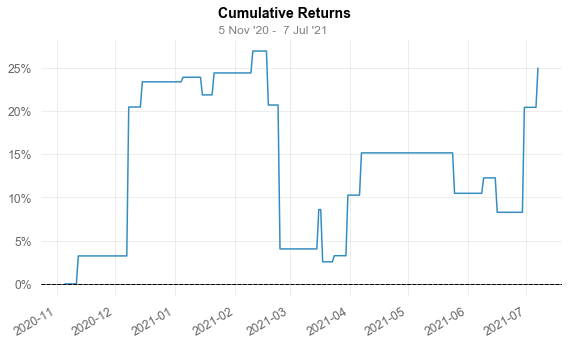

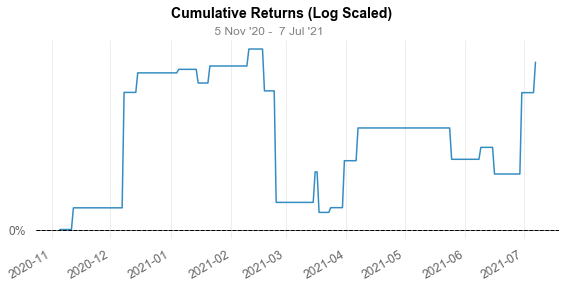

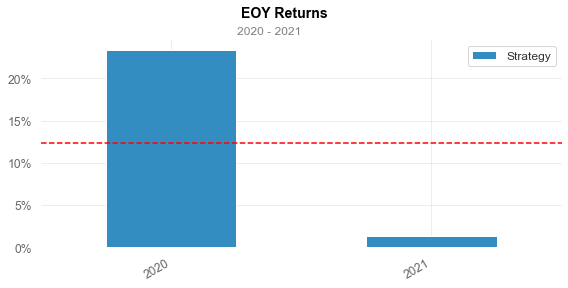

AttributeError: module 'seaborn' has no attribute 'histplot'

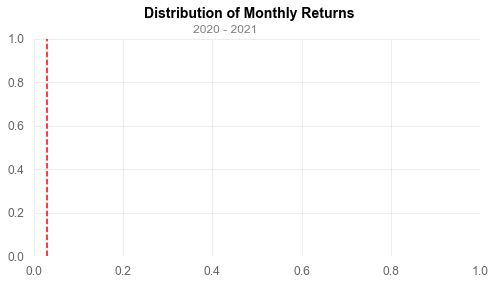

In [217]:
qs.extend_pandas()

net_worth = pd.Series(env.history['total_profit'], index=df.index[frameLowBound+1:frameHighBound])
returns = net_worth.pct_change().iloc[1:]

qs.reports.full(returns)
qs.reports.html(returns, output='a2c_quantstats.html')